## Chatbots With Langgraph

In [1]:
!pip install -U langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.8/378.8 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.4.16
    Uninstalling langsmith-0.4.16:
      Successfully uninstalled langsmith-0.4.16


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.74
    Uninstalling langchain-core-0.3.74:
      Successfully uninstalled langchain-core-0.3.74
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which 

In [3]:
from google.colab import userdata
groq_api_key=userdata.get('GROQ_API_KEY')
langsmith=userdata.get('LANGCHAIN_API_KEY')


In [4]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [5]:
from langchain_groq import ChatGroq

In [7]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ee0a4b916a0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ee0a4b91c40>, model_name='gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start Building Chatbot Using Langgraph

In [8]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END#shows the flow of the whole graph as well
from langgraph.graph.message import add_messages#so the state graph needs to be changed every time so this function is used
#when we will add query to the llm the llm will generate the reponse and that response will be added as the message and the state graph will keep on changing

In [9]:
class State(TypedDict):#inheriting the typeddict
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [10]:
graph_builder

In [11]:
def chatbot(state:State):#based on this State the state messages will be updated
  return {"messages":llm.invoke(state['messages'])}

In [12]:
graph_builder.add_node("chatbot",chatbot)#in qoutes it is the name of the node

In [13]:
graph_builder

In [14]:
graph_builder.add_edge(START,"chatbot")# for adding the edges
graph_builder.add_edge("chatbot",END)

In [15]:
graph=graph_builder.compile()#entire graph is ready

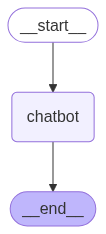

In [16]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [17]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:#breaking of the loop
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])#user message
      print("Assistant:",value["messages"].content)#Assitant message is basically the messages that are recieved from the llm's

User: helolo
dict_values([{'messages': AIMessage(content='Hello! 👋  \n\nIt looks like you meant to say "hello." How can I help you today? 😊 \n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 11, 'total_tokens': 38, 'completion_time': 0.049090909, 'prompt_time': 0.0011773, 'queue_time': 0.092946694, 'total_time': 0.050268209}, 'model_name': 'gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--f775e43b-5c1f-4c4c-966d-ffc362849421-0', usage_metadata={'input_tokens': 11, 'output_tokens': 27, 'total_tokens': 38})}])
content='Hello! 👋  \n\nIt looks like you meant to say "hello." How can I help you today? 😊 \n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 11, 'total_tokens': 38, 'completion_time': 0.049090909, 'prompt_time': 0.0011773, 'queue_time': 0.092946694, 'total_time': 0.050268209}, 'model_name': 'g